In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

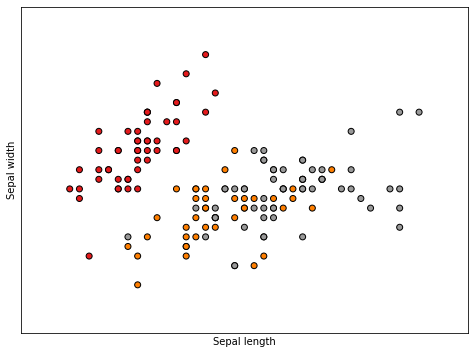

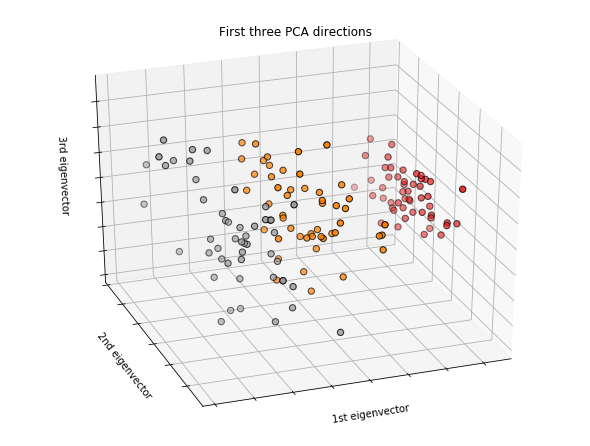

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# KNN

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#分割成训练集和测试集

In [6]:
set(y)

{0, 1, 2}

In [7]:
knn=KNeighborsClassifier(3)
knn.fit(x_train,y_train)
y_pre=knn.predict(x_test)

In [8]:
(y_pre==y_test).sum()/len(y_test)

0.9777777777777777

In [9]:
scores=knn.score(x_test,y_test)

# Decision Tree

In [10]:
from sklearn.datasets import load_boston
from sklearn import tree

In [11]:
boston=load_boston()
x=boston.data
y=boston.target

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)#分割成训练集和测试集

In [13]:
clf=tree.DecisionTreeRegressor()
clf.fit(x_train,y_train)
pre=clf.predict(x_test)

In [14]:
clf.score(x_test,y_test)  #回归的score计算的是coefficient of determination，1>0

0.6869654338670174

# Naive_bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)#分割成训练集和测试集

In [18]:
clf=GaussianNB()
clf.fit(x_train,y_train)
clf.predict(x_test)

array([2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       0])

In [19]:
clf.score(x_test,y_test)

0.9565217391304348

# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
iris = datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)#分割成训练集和测试集
clf=LogisticRegression()


In [22]:
clf.fit(x_train,y_train)
pre=clf.predict(x_test)
clf.score(x_test,y_test)

D:\sysu\anaconda\anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sysu\anaconda\anacondaa\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

# Kmeans

In [23]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

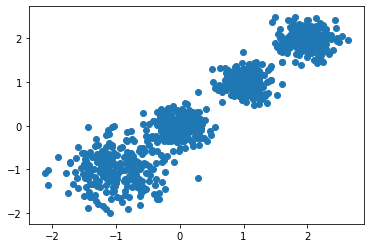

In [24]:
X, y = make_blobs(n_samples=1000, n_features=2,
centers=[[-1,-1], [0,0], [1,1], [2,2]],
cluster_std=[0.4, 0.2, 0.2, 0.2],
random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

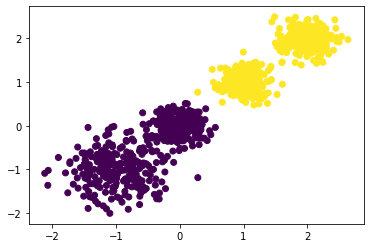

3116.1706763322227


D:\sysu\anaconda\anacondaa\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
#用Calinski-Harabasz Index评估二分类的聚类分数
print(metrics.calinski_harabaz_score(X, y_pred))
#Calinski-Harabasz Index对应的方法是metrics.calinski_harabaz_score

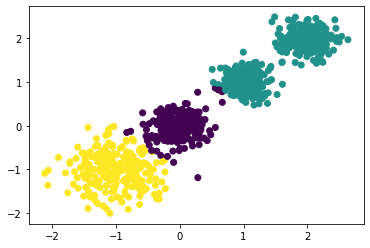

2931.625030199556


D:\sysu\anaconda\anacondaa\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print(metrics.calinski_harabaz_score(X, y_pred))
#用Calinski-Harabasz Index评估三分类的聚类分数

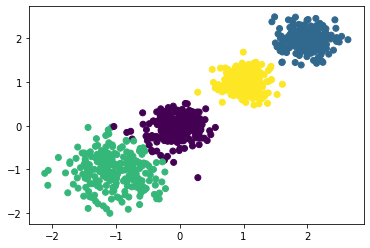

5924.050613480169


D:\sysu\anaconda\anacondaa\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print(metrics.calinski_harabaz_score(X, y_pred))
#用Calinski-Harabasz Index评估四分类的聚类分数